In [3]:
import pandas as pd 
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [4]:
disease_df = pd.read_csv('framingham.csv')

In [5]:
disease_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
disease_df.rename(columns={'male':'Sex_male'}, inplace = True)
disease_df.dropna(axis = 0, inplace = True)
disease_df

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [7]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3101
1     557
Name: count, dtype: int64


In [8]:
X = np.asarray(disease_df[['age', 'Sex_male','cigsPerDay','totChol', 'sysBP','glucose']])
y = np.asarray(disease_df['TenYearCHD'])
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (2560, 6) (2560,)
Test set: (1098, 6) (1098,)


C:\Users\carlo\AppData\Local\Temp\ipykernel_21472\3450285668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


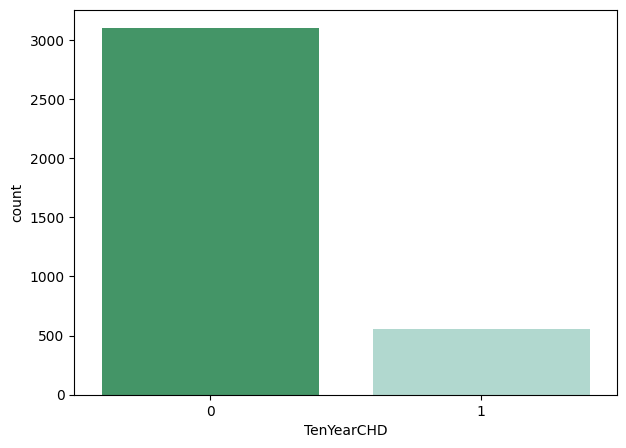

In [9]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()


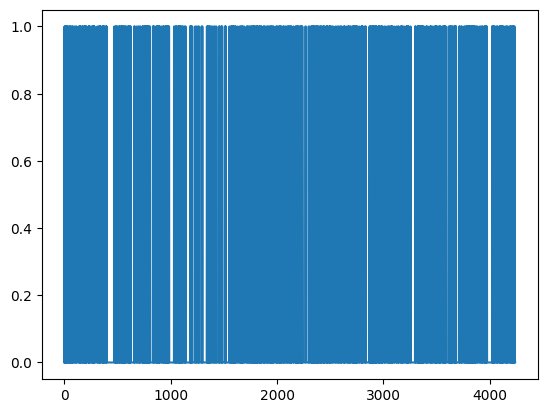

In [10]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)


In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy of XGBClassifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))

Accuracy of XGBClassifier on test set: 0.81


In [15]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

traind_data = lgb.Dataset(X_train, label=y_train)
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 11,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

gbm = lgb.train(params, traind_data, num_boost_round=100)

y_pred = gbm.predict(X_test)


[LightGBM] [Info] Number of positive: 381, number of negative: 2179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148828 -> initscore=-1.743822
[LightGBM] [Info] Start training from score -1.743822


In [16]:
accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
print('Accuracy of LightGBM classifier on test set: {:.2f}'.format(accuracy))

Accuracy of LightGBM classifier on test set: 0.84


In [17]:
params2 = {
    'objective': 'binary',
    'boosting_type': 'goss',
    'metric': 'binary_logloss',
    'num_leaves': 3,
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

train_data = lgb.Dataset(X_train, label=y_train)

gbm_goss = lgb.train(params, train_data, num_boost_round=100)

y_pred_goss = gbm_goss.predict(X_test)

[LightGBM] [Info] Number of positive: 381, number of negative: 2179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148828 -> initscore=-1.743822
[LightGBM] [Info] Start training from score -1.743822


In [18]:
accuracy_goss = accuracy_score(y_test, (y_pred_goss > 0.5).astype(int))
print('Accuracy of LightGBM with GOSS classifier on test set: {:.2f}'.format(accuracy_goss))

Accuracy of LightGBM with GOSS classifier on test set: 0.84


In [19]:
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 5,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'enable_bundle': True  
}

gbm_efb = lgb.train(params, train_data, num_boost_round=100)

y_pred_efb = gbm_efb.predict(X_test)

[LightGBM] [Info] Number of positive: 381, number of negative: 2179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148828 -> initscore=-1.743822
[LightGBM] [Info] Start training from score -1.743822


In [20]:
accuracy_efb = accuracy_score(y_test, (y_pred_efb > 0.5).astype(int))
print('Accuracy of LightGBM with EFB classifier on test set: {:.2f}'.format(accuracy_efb))

Accuracy of LightGBM with EFB classifier on test set: 0.84


In [49]:
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss',
    'num_leaves': 11,
    'learning_rate': 0.05,
    'histogram_pool_size': 1024  
}

gbm_hist = lgb.train(params, train_data, num_boost_round=100)

y_pred_hist = gbm_hist.predict(X_test)

[LightGBM] [Info] Number of positive: 381, number of negative: 2179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148828 -> initscore=-1.743822
[LightGBM] [Info] Start training from score -1.743822


In [22]:
accuracy_hist = accuracy_score(y_test, (y_pred_hist > 0.5).astype(int))
print('Accuracy of LightGBM with Histogram-Bases Learning classifier on test set: {:.2f}'.format(accuracy_hist))

Accuracy of LightGBM with Histogram-Bases Learning classifier on test set: 0.84


In [23]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

In [55]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X, y)
y_pred = svm.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, (y_pred>0.5).astype(int))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(accuracy))

Accuracy of SVM classifier on test set: 0.86


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X, y)
y_pred = regressor.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print('Accuracy of Random Forest regressor on test set: {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy of Random Forest regressor on test set: 0.82


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

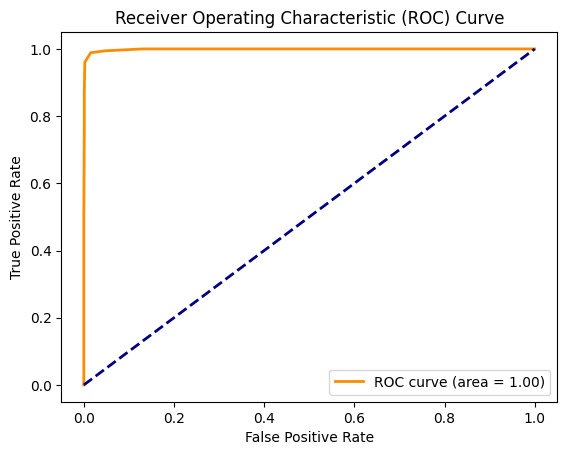

AUC: 1.00


In [31]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# También puedes calcular el AUC directamente
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc_score:.2f}')

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       922
           1       0.99      0.88      0.93       176

    accuracy                           0.98      1098
   macro avg       0.99      0.94      0.96      1098
weighted avg       0.98      0.98      0.98      1098



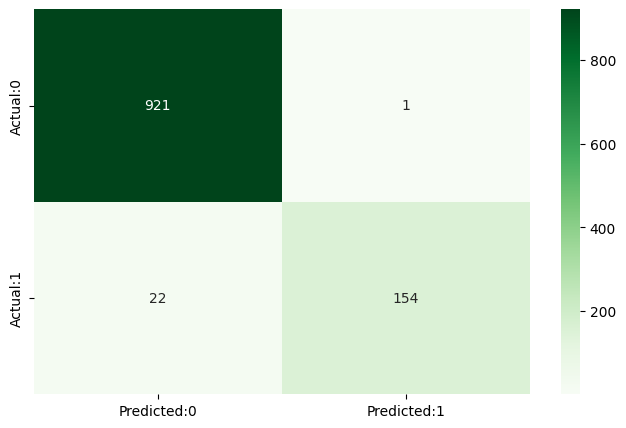

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_binary = (y_pred > 0.5).astype(int)

print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred_binary))

cm = confusion_matrix(y_test, y_pred_binary)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
